In [1333]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1334]:
gene_expression=pd.read_csv("LEV_ML_data/all/lev_ccle_exp_dat.csv", index_col=False)

In [1335]:
gene_expression.shape

(134, 562)

In [1336]:
targets=pd.read_csv("LEV_ML_data/all/lev_ccle_target_dat.csv", index_col=False)

In [1337]:
gene_expression=gene_expression.drop(columns=['Unnamed: 0'])

In [1338]:
standarize = lambda x: (x-x.mean()) / x.std()
gene_expression=gene_expression.pipe(standarize)

In [1339]:
gene_expression.to_csv("gene_expression.csv",header=True, index=False)

In [3234]:
cell_count_aa=targets[targets.columns[-1]]

In [3249]:
cell_count_aa=np.array(cell_count_aa.astype(float))

In [3250]:
cell_count_aa

array([1.09, 0.95, 2.49, 2.43, 1.61, 1.46, 1.06, 2.41, 1.1 , 2.58, 1.11,
       1.14, 0.51, 3.12, 2.17, 2.36, 2.28, 0.79, 1.96, 2.33, 0.64, 2.39,
       1.09, 2.14, 2.31, 0.54, 1.54, 1.18, 0.39, 0.78, 0.81, 2.14, 0.93,
       1.07, 2.12, 1.94, 1.2 , 2.1 , 1.92, 0.83, 1.38, 2.13, 1.55, 0.96,
       3.02, 2.47, 2.49, 0.35, 2.61, 1.45, 1.65, 1.9 , 1.31, 2.5 , 1.06,
       0.47, 0.39, 1.38, 0.47, 1.37, 2.4 , 0.53, 0.48, 0.83, 0.85, 1.57,
       2.19, 0.78, 1.71, 1.85, 1.3 , 1.84, 1.32, 0.88, 0.89, 1.3 , 0.44,
       2.06, 2.14, 1.44, 0.83, 2.23, 2.06, 2.38, 2.24, 1.57, 2.34, 1.36,
       1.18, 1.36, 0.38, 0.38, 0.76, 0.74, 1.07, 2.2 , 0.88, 1.91, 2.  ,
       1.77, 1.73, 1.51, 1.12, 0.85, 1.53, 1.63, 1.74, 2.39, 2.81, 1.72,
       2.71, 2.3 , 1.67, 5.  , 2.21, 0.83, 0.98, 1.63, 2.23, 2.28, 0.82,
       1.97, 1.32, 1.06, 2.65, 0.14, 0.7 , 1.34, 1.53, 0.89, 0.81, 2.6 ,
       1.12, 1.67])

In [1340]:
df = pd.DataFrame(data=cell_count_aa)
df=df.T

In [1341]:
df.to_csv("target1.csv",header=False, index=False)

In [1342]:
def readcsv(filename):
    ifile = open(filename, "r")
    reader = csv.reader(ifile, delimiter=",")
    rownum = 0
    a = []
    for row in reader:
        a.append (row)
        rownum += 1   
    ifile.close()
    return a

In [3192]:
set1=[196,193,152,195,410,521,31,454,470,86,2,438,56,149,497,100,420,79,468,337,209,239,85,302,450,271,326,376,23,471,324,45,102,114,200,24,
164,73,9,232,233,472,463,286,336,42,177,140,25,74]

In [3193]:
set2=[438,196,59,125,420,200,463,86,449,470,193,414,292,79,361,336,440,468,23,409,475,494,405,324,2,140,120,194,439,548,42,517,224,302,362,81,
454,250,149,51,124,207,378,172,425,267,127,210,282,266]

In [3236]:
set2=[438,196,59,125,420,200,463,86,449,470,193,414,292,79,361,336,440,468,23,409,475,494,405,324,2,140,120,194,439,548,42,517,224,302,362,81,
454,250,149,51,124,207,378]

In [3237]:
len(set2)

43

In [3251]:
gene_indexes=set2

In [3252]:
y=cell_count_aa

In [3253]:
gene_names=gene_expression.columns

In [3254]:
gene_exp_top50=gene_expression[gene_expression.columns[gene_indexes]]

In [3255]:
from sklearn.model_selection import LeaveOneOut
X = gene_exp_top50
y = cell_count_aa
loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

LeaveOneOut()


# Linear Regression

In [3259]:
prediction=[]
actual_value=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = linear_model.LinearRegression()
    reg.fit(X_train,y_train)
    prediction_val=reg.predict(X_test)[0]
    prediction.append(prediction_val)
    actual_value.append(y_test[0])

In [3260]:
from scipy.stats import spearmanr

In [3262]:
rho, pval = spearmanr(actual_value,prediction)

In [3263]:
rho

0.5786616829629545

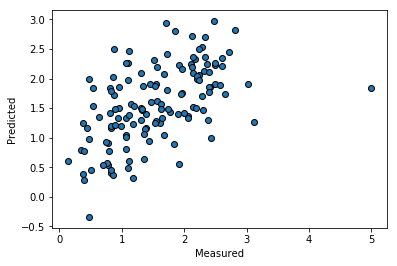

In [3134]:
predicted = prediction
fig, ax = plt.subplots()
ax.scatter(actual_value, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Lasso Regression

In [3264]:
from sklearn import linear_model
prediction=[]
actual_value=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = linear_model.Lasso(alpha=0.05)
    clf.fit(X_train,y_train)
    prediction_val=clf.predict(X_test)[0]
    prediction.append(prediction_val)
    actual_value.append(y_test[0])

In [3265]:
from scipy.stats import spearmanr
rho, pval = spearmanr(actual_value,prediction)

In [3266]:
rho

0.6641236899266594

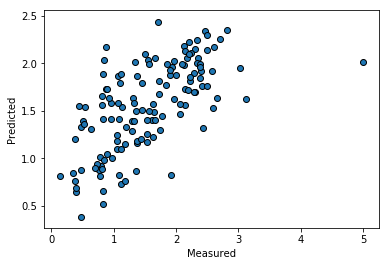

In [3267]:
predicted = prediction

fig, ax = plt.subplots()
ax.scatter(actual_value, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# SGDRegressor

In [3268]:
import numpy as np
from sklearn import linear_model
clf2 = linear_model.SGDRegressor(loss="epsilon_insensitive",penalty="elasticnet",l1_ratio=0.25)

In [3269]:
prediction=[]
actual_value=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf2.fit(X_train,y_train)
    prediction_val=clf2.predict(X_test)[0]
    prediction.append(prediction_val)
    actual_value.append(y_test[0])

In [3270]:
from scipy.stats import spearmanr
rho, pval = spearmanr(actual_value,prediction)

In [3271]:
rho

0.6589961690232691

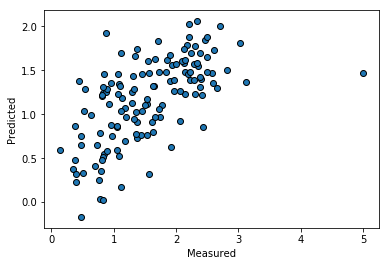

In [3272]:
predicted = prediction
fig, ax = plt.subplots()
ax.scatter(actual_value, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# RandomForestRegressor

In [3273]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=8, random_state=0,n_estimators=15)
prediction=[]
actual_value=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(X_train,y_train)
    prediction_val=regr.predict(X_test)[0]
    prediction.append(prediction_val)
    actual_value.append(y_test[0])

In [3274]:
from scipy.stats import spearmanr
rho, pval = spearmanr(actual_value,prediction)

In [3275]:
rho

0.5921089556823514

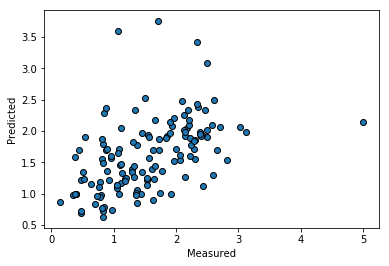

In [3276]:
predicted = prediction
fig, ax = plt.subplots()
ax.scatter(actual_value, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Support Vector Regressor

In [3277]:
from sklearn.svm import SVR

regr = SVR(kernel="poly",epsilon=0.1,degree=3,coef0=0.05)
prediction=[]
actual_value=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(X_train,y_train)
    prediction_val=regr.predict(X_test)[0]
    prediction.append(prediction_val)
    actual_value.append(y_test[0])

In [3278]:
from scipy.stats import spearmanr
rho, pval = spearmanr(actual_value,prediction)

In [3279]:
rho

0.6086561838895471

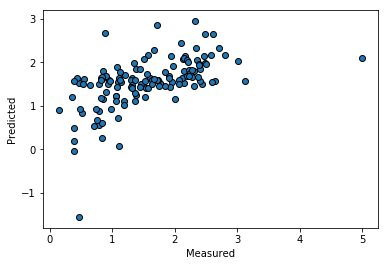

In [3280]:
predicted = prediction

fig, ax = plt.subplots()
ax.scatter(actual_value, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# GradientBoostingRegressor

In [3281]:
from sklearn.ensemble import GradientBoostingRegressor

In [3282]:
regr =GradientBoostingRegressor(loss="ls") 
prediction=[]
actual_value=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(X_train,y_train)
    prediction_val=regr.predict(X_test)[0]
    prediction.append(prediction_val)
    actual_value.append(y_test[0])

In [3283]:
from scipy.stats import spearmanr
rho, pval = spearmanr(actual_value,prediction)

In [3284]:
rho

0.6099006551593875

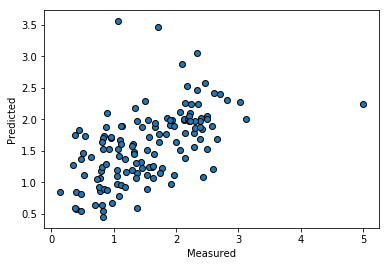

In [3285]:
predicted = prediction

fig, ax = plt.subplots()
ax.scatter(actual_value, predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [3286]:
from sklearn.linear_model import ElasticNet

In [3287]:
regr = ElasticNet(alpha=0.2,l1_ratio=0.125)
prediction=[]
actual_value=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(X_train,y_train)
    prediction_val=regr.predict(X_test)[0]
    prediction.append(prediction_val)
    actual_value.append(y_test[0])

In [3288]:
from scipy.stats import spearmanr
rho, pval = spearmanr(actual_value,prediction)

In [3289]:
rho

0.6985224719405028

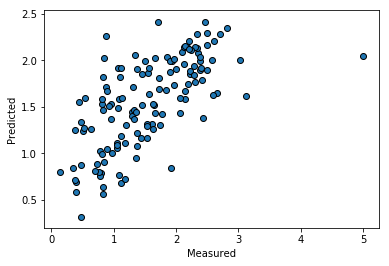

In [3290]:
fig, ax = plt.subplots()
ax.scatter(actual_value, prediction, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [3291]:
from sklearn.metrics import r2_score
y_true = actual_value
y_pred = prediction
r2_score(y_true, y_pred)  

0.4388260823155987

In [3292]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

0.31664419258616094

In [3293]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

0.40740475801401776

In [3294]:
len(set2)

43

In [3295]:
from scipy.stats import pearsonr

In [3296]:
pearsonr(actual_value,prediction)

(0.6629776595463381, 2.625841110459976e-18)

In [3297]:
kendalltau(actual_value,prediction)

KendalltauResult(correlation=0.5044711507365254, pvalue=6.1799922398584926e-18)

In [3298]:
from scipy.stats import kendalltau

In [3299]:
difference=[]
for i in range(len(actual_value)):
    difference.append(actual_value[i]-prediction[i])

In [3300]:
d = {'Prediction': prediction, 'Actual Value': actual_value, 'Difference': difference}
df = pd.DataFrame(data=d)

In [3301]:
df

,Actual Value,Difference,Prediction
0,1.09,-0.499046,1.589046
1,0.95,-0.578201,1.528201
2,2.49,0.329623,2.160377
3,2.43,1.053155,1.376845
4,1.61,0.298050,1.311950
5,1.46,-0.059704,1.519704
6,1.06,0.004815,1.055185
7,2.41,0.622559,1.787441
8,1.10,-0.715972,1.815972
9,2.58,0.574667,2.005333
